<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

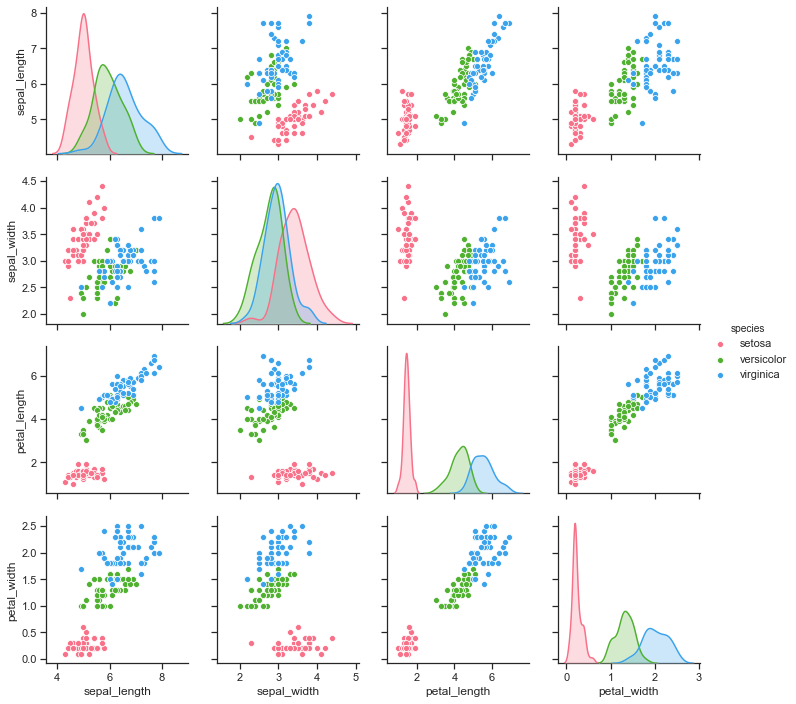

In [29]:
%matplotlib inline 
#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="ticks", color_codes=True) #ticks 방식으로 그림을 그린다.
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="husl") #hue옵션으로 색상을 씌워 보기 쉽게 하였음, 팔레트로 색상 변경

iris.info()

iris['species'].unique()


In [14]:
from sklearn.preprocessing import LabelEncoder

X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [32]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 1s 6ms/step - loss: 0.9995 - acc: 0.4250 - val_loss: 1.0227 - val_acc: 0.2000
Epoch 2/100
120/120 [==============================] - 0s 400us/step - loss: 0.9153 - acc: 0.4250 - val_loss: 0.9501 - val_acc: 0.5667
Epoch 3/100
120/120 [==============================] - 0s 492us/step - loss: 0.8443 - acc: 0.6833 - val_loss: 0.8707 - val_acc: 0.5667
Epoch 4/100
120/120 [==============================] - 0s 292us/step - loss: 0.7768 - acc: 0.6917 - val_loss: 0.7966 - val_acc: 0.5667
Epoch 5/100
120/120 [==============================] - 0s 100us/step - loss: 0.7251 - acc: 0.6917 - val_loss: 0.7383 - val_acc: 0.6000
Epoch 6/100
120/120 [==============================] - 0s 150us/step - loss: 0.6751 - acc: 0.6917 - val_loss: 0.6979 - val_acc: 0.6000
Epoch 7/100
120/120 [==============================] - 0s 125us/step - loss: 0.6315 - acc: 0.6917 - val_loss: 0.6551 - val_acc: 0.6000
Epoch 8/100


120/120 [==============================] - 0s 233us/step - loss: 0.1197 - acc: 0.9583 - val_loss: 0.1355 - val_acc: 0.9667
Epoch 62/100
120/120 [==============================] - 0s 225us/step - loss: 0.1102 - acc: 0.9667 - val_loss: 0.1119 - val_acc: 1.0000
Epoch 63/100
120/120 [==============================] - 0s 125us/step - loss: 0.1055 - acc: 0.9583 - val_loss: 0.1062 - val_acc: 0.9667
Epoch 64/100
120/120 [==============================] - 0s 117us/step - loss: 0.1146 - acc: 0.9500 - val_loss: 0.1095 - val_acc: 1.0000
Epoch 65/100
120/120 [==============================] - 0s 92us/step - loss: 0.1046 - acc: 0.9583 - val_loss: 0.1058 - val_acc: 1.0000
Epoch 66/100
120/120 [==============================] - 0s 100us/step - loss: 0.1048 - acc: 0.9667 - val_loss: 0.1086 - val_acc: 1.0000
Epoch 67/100
120/120 [==============================] - 0s 108us/step - loss: 0.1041 - acc: 0.9583 - val_loss: 0.1001 - val_acc: 1.0000
Epoch 68/100
120/120 [==============================] - 0s 108

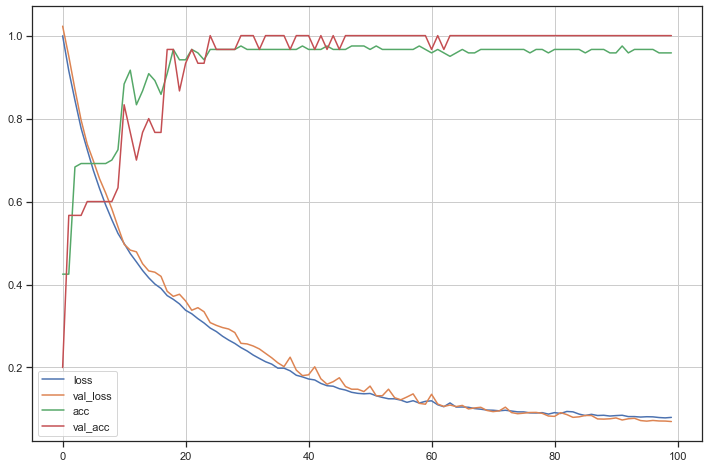

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

In [34]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

30/30 [==============================] - 0s 33us/step
Accuracy = 1.00
